## Getting Started

In [1]:
# check gpu availability
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load data
train = pd.read_csv('data\\train.csv')
holidays = pd.read_csv('data\\holidays_events.csv')
stores = pd.read_csv('data\\stores.csv')
oil = pd.read_csv('data\\oil.csv')
transactions = pd.read_csv('data\\transactions.csv')

In [4]:
# set date as index
holidays['date'] = pd.to_datetime(holidays['date'])

oil['date'] = pd.to_datetime(oil['date'])

train['date'] = pd.to_datetime(train['date'])

transactions['date'] = pd.to_datetime(transactions['date'])

## Exploratory Data Analysis

#### Data Overview

In [5]:
train.head()

id       date  store_nbr      family  sales  onpromotion
0   0 2013-01-01          1  AUTOMOTIVE    0.0            0
1   1 2013-01-01          1   BABY CARE    0.0            0
2   2 2013-01-01          1      BEAUTY    0.0            0
3   3 2013-01-01          1   BEVERAGES    0.0            0
4   4 2013-01-01          1       BOOKS    0.0            0

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB


In [7]:
# unique values in train data
train.nunique()

id             3000888
date              1684
store_nbr           54
family              33
sales           379610
onpromotion        362
dtype: int64

In [8]:
holidays.head()

date     type    locale locale_name                    description  \
0 2012-03-02  Holiday     Local       Manta             Fundacion de Manta   
1 2012-04-01  Holiday  Regional    Cotopaxi  Provincializacion de Cotopaxi   
2 2012-04-12  Holiday     Local      Cuenca            Fundacion de Cuenca   
3 2012-04-14  Holiday     Local    Libertad      Cantonizacion de Libertad   
4 2012-04-21  Holiday     Local    Riobamba      Cantonizacion de Riobamba   

   transferred  
0        False  
1        False  
2        False  
3        False  
4        False

In [9]:
holidays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         350 non-null    datetime64[ns]
 1   type         350 non-null    object        
 2   locale       350 non-null    object        
 3   locale_name  350 non-null    object        
 4   description  350 non-null    object        
 5   transferred  350 non-null    bool          
dtypes: bool(1), datetime64[ns](1), object(4)
memory usage: 14.1+ KB


In [10]:
# unique values in holidays data
holidays.nunique()

date           312
type             6
locale           3
locale_name     24
description    103
transferred      2
dtype: int64

In [11]:
stores.head()

store_nbr           city                           state type  cluster
0          1          Quito                       Pichincha    D       13
1          2          Quito                       Pichincha    D       13
2          3          Quito                       Pichincha    D        8
3          4          Quito                       Pichincha    D        9
4          5  Santo Domingo  Santo Domingo de los Tsachilas    D        4

In [12]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [13]:
# unique values in stores data
stores.nunique()

store_nbr    54
city         22
state        16
type          5
cluster      17
dtype: int64

In [14]:
oil.head()

date  dcoilwtico
0 2013-01-01         NaN
1 2013-01-02       93.14
2 2013-01-03       92.97
3 2013-01-04       93.12
4 2013-01-07       93.20

In [15]:
transactions.head()

date  store_nbr  transactions
0 2013-01-01         25           770
1 2013-01-02          1          2111
2 2013-01-02          2          2358
3 2013-01-02          3          3487
4 2013-01-02          4          1922

In [16]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          83488 non-null  datetime64[ns]
 1   store_nbr     83488 non-null  int64         
 2   transactions  83488 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.9 MB


### Data Quality Assessment

In [17]:
# plot transactions data for each store_nbr over time
import plotly.graph_objects as go

# Create an empty figure
fig = go.Figure()

# Add a line for each store
for store in transactions['store_nbr'].unique():
    store_data = transactions[transactions['store_nbr'] == store]
    fig.add_trace(go.Scatter(x=store_data.index, y=store_data['transactions'], mode='lines', name=f'Store {store}'))

# Set the layout
fig.update_layout(title='Transactions over time per store', yaxis_title='Transactions')

# Update xaxis properties with date formatting
fig.update_xaxes(title_text='Date', tickformat="%d-%b-%Y")

# Show the figure
fig.show()

In [18]:
import plotly.subplots as sp

# Determine the layout of the grid
num_stores = transactions['store_nbr'].nunique()
cols = 3  # number of columns in the grid
rows = num_stores // cols if num_stores % cols == 0 else num_stores // cols + 1

# Create an empty subplot
fig = sp.make_subplots(rows=rows, cols=cols, subplot_titles=[f'Store {store}' for store in transactions['store_nbr'].unique()])

# Add a line for each store
for i, store in enumerate(transactions['store_nbr'].unique(), start=1):
    store_data = transactions[transactions['store_nbr'] == store]
    fig.add_trace(go.Scatter(x=store_data.index, y=store_data['transactions'], mode='lines'), row=(i-1)//cols+1, col=(i-1)%cols+1)

# Set the layout
fig.update_layout(height=300*rows, title='Transactions over time per store', xaxis_title='Date', yaxis_title='Transactions')

# Show the figure
fig.show()

## Data Cleaning

### Missing Values

In [19]:
# list the records for missing values in oil data
oil[oil['dcoilwtico'].isnull()]

date  dcoilwtico
0    2013-01-01         NaN
14   2013-01-21         NaN
34   2013-02-18         NaN
63   2013-03-29         NaN
104  2013-05-27         NaN
132  2013-07-04         NaN
174  2013-09-02         NaN
237  2013-11-28         NaN
256  2013-12-25         NaN
261  2014-01-01         NaN
274  2014-01-20         NaN
294  2014-02-17         NaN
338  2014-04-18         NaN
364  2014-05-26         NaN
393  2014-07-04         NaN
434  2014-09-01         NaN
497  2014-11-27         NaN
517  2014-12-25         NaN
522  2015-01-01         NaN
534  2015-01-19         NaN
554  2015-02-16         NaN
588  2015-04-03         NaN
624  2015-05-25         NaN
653  2015-07-03         NaN
699  2015-09-07         NaN
757  2015-11-26         NaN
778  2015-12-25         NaN
783  2016-01-01         NaN
794  2016-01-18         NaN
814  2016-02-15         NaN
843  2016-03-25         NaN
889  2016-05-30         NaN
914  2016-07-04         NaN
959  2016-09-05         NaN
1017 2016-11-24         NaN
1039 2016-12-26         NaN
1044 2017-01-02         NaN
1054 2017-01-16         NaN
1079 2017-02-20         NaN
1118 2017-04-14         NaN
1149 2017-05-29         NaN
1174 2017-07-03         NaN
1175 2017-07-04         NaN

In [20]:
# see if there were holidays on the days when oil price was missing
holidays[holidays['date'].isin(oil[oil['dcoilwtico'].isnull()]['date'])]

date        type    locale    locale_name  \
41  2013-01-01     Holiday  National        Ecuador   
89  2013-12-25     Holiday  National        Ecuador   
92  2014-01-01     Holiday  National        Ecuador   
99  2014-04-18     Holiday  National        Ecuador   
120 2014-07-04       Event  National        Ecuador   
155 2014-12-25     Holiday  National        Ecuador   
159 2015-01-01     Holiday  National        Ecuador   
162 2015-02-16     Holiday  National        Ecuador   
166 2015-04-03     Holiday  National        Ecuador   
179 2015-07-03     Holiday     Local      El Carmen   
180 2015-07-03     Holiday     Local  Santo Domingo   
208 2015-12-25     Holiday  National        Ecuador   
211 2016-01-01     Holiday  National        Ecuador   
215 2016-03-25     Holiday  National        Ecuador   
295 2016-12-26  Additional  National        Ecuador   
298 2017-01-02    Transfer  National        Ecuador   
305 2017-04-14     Holiday     Local       Libertad   
306 2017-04-14     Holiday  National        Ecuador   
318 2017-07-03     Holiday     Local      El Carmen   
319 2017-07-03     Holiday     Local  Santo Domingo   

                                    description  transferred  
41                           Primer dia del ano        False  
89                                      Navidad        False  
92                           Primer dia del ano        False  
99                                Viernes Santo        False  
120  Mundial de futbol Brasil: Cuartos de Final        False  
155                                     Navidad        False  
159                          Primer dia del ano        False  
162                                    Carnaval        False  
166                               Viernes Santo        False  
179                  Cantonizacion de El Carmen        False  
180                  Fundacion de Santo Domingo        False  
208                                     Navidad        False  
211                          Primer dia del ano        False  
215                               Viernes Santo        False  
295                                   Navidad+1        False  
298                 Traslado Primer dia del ano        False  
305                   Cantonizacion de Libertad        False  
306                               Viernes Santo        False  
318                  Cantonizacion de El Carmen        False  
319                  Fundacion de Santo Domingo        False

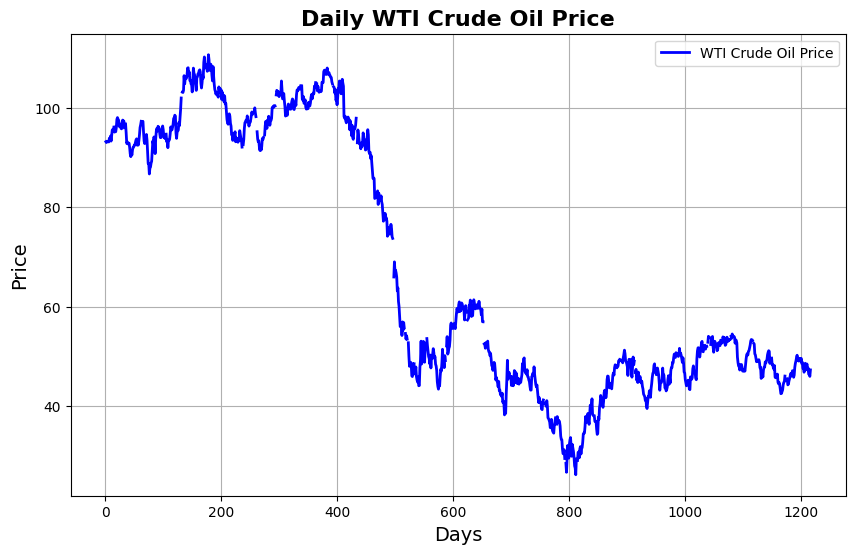

In [21]:
# plot a line graph of the oil price
plt.figure(figsize=(10, 6))
plt.plot(oil['dcoilwtico'], color='blue', linestyle='-', linewidth=2, label='WTI Crude Oil Price')
plt.title('Daily WTI Crude Oil Price', fontsize=16, fontweight='bold')
plt.xlabel('Days', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [22]:
# Forward fill the missing values in oil data on holidays
oil.loc[oil['date'].isin(holidays['date']), 'dcoilwtico'] = oil.loc[oil['date'].isin(holidays['date']), 'dcoilwtico'].ffill()

In [23]:
# list the records for missing values in oil data
oil[oil['dcoilwtico'].isnull()]

date  dcoilwtico
0    2013-01-01         NaN
14   2013-01-21         NaN
34   2013-02-18         NaN
63   2013-03-29         NaN
104  2013-05-27         NaN
132  2013-07-04         NaN
174  2013-09-02         NaN
237  2013-11-28         NaN
274  2014-01-20         NaN
294  2014-02-17         NaN
364  2014-05-26         NaN
434  2014-09-01         NaN
497  2014-11-27         NaN
534  2015-01-19         NaN
624  2015-05-25         NaN
699  2015-09-07         NaN
757  2015-11-26         NaN
794  2016-01-18         NaN
814  2016-02-15         NaN
889  2016-05-30         NaN
914  2016-07-04         NaN
959  2016-09-05         NaN
1017 2016-11-24         NaN
1054 2017-01-16         NaN
1079 2017-02-20         NaN
1149 2017-05-29         NaN
1175 2017-07-04         NaN

In [24]:
# interpolate missing values in oil price
oil['dcoilwtico'] = oil['dcoilwtico'].interpolate()

In [25]:
# backward fill the remaining missing values in oil data
oil['dcoilwtico'] = oil['dcoilwtico'].bfill()

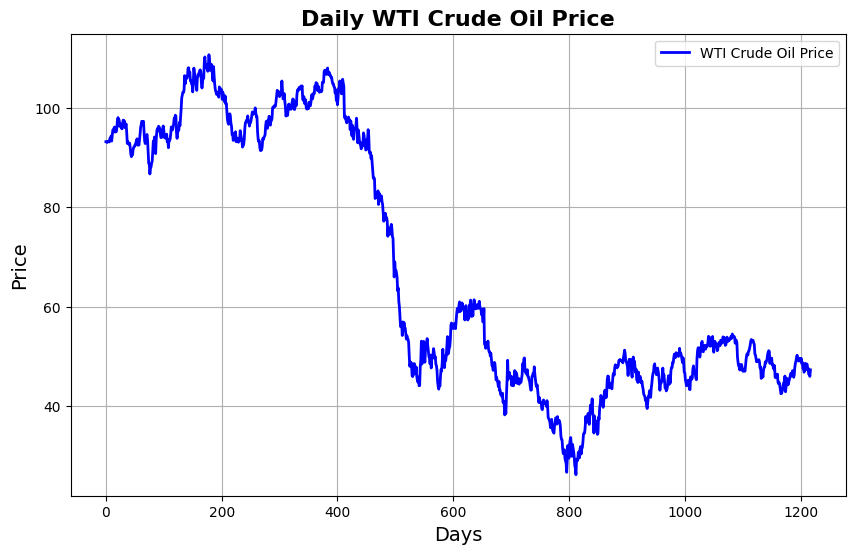

In [26]:
# plot a line graph of the oil price
plt.figure(figsize=(10, 6))
plt.plot(oil['dcoilwtico'], color='blue', linestyle='-', linewidth=2, label='WTI Crude Oil Price')
plt.title('Daily WTI Crude Oil Price', fontsize=16, fontweight='bold')
plt.xlabel('Days', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [27]:
# list the records for missing values in oil data
oil[oil['dcoilwtico'].isnull()]

Empty DataFrame
Columns: [date, dcoilwtico]
Index: []

### Outliers

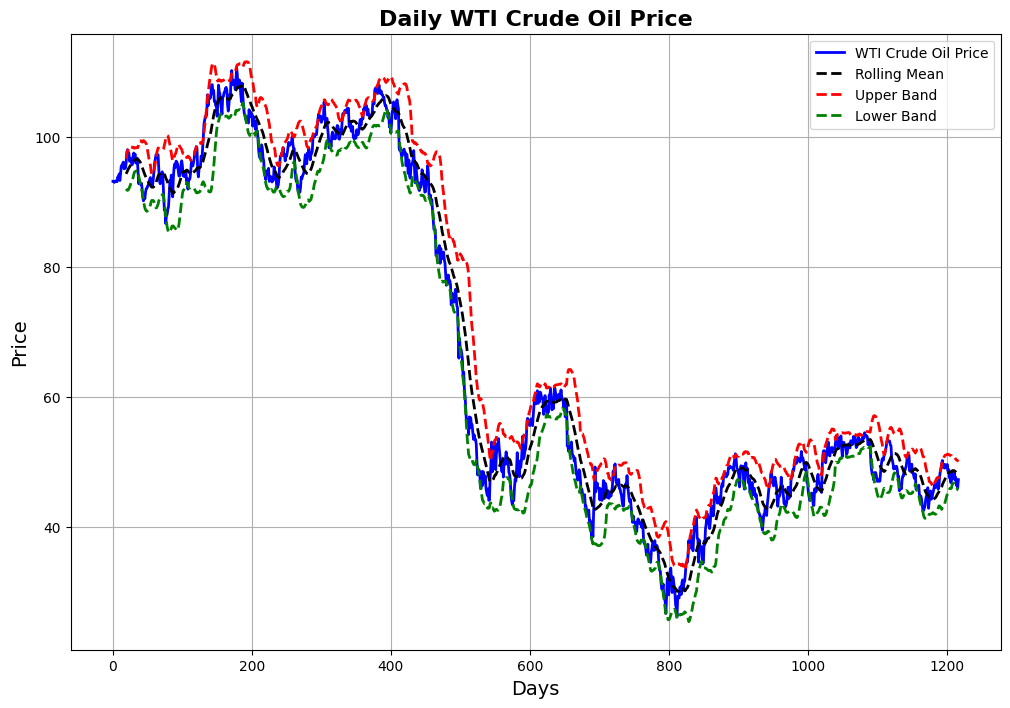

In [28]:
# outlier detection using bollinger bands
oil['rolling_mean'] = oil['dcoilwtico'].rolling(window=20).mean()
oil['rolling_std'] = oil['dcoilwtico'].rolling(window=20).std()
oil['upper_band'] = oil['rolling_mean'] + (oil['rolling_std'] * 2)
oil['lower_band'] = oil['rolling_mean'] - (oil['rolling_std'] * 2)

plt.figure(figsize=(12, 8))
plt.plot(oil['dcoilwtico'], color='blue', linestyle='-', linewidth=2, label='WTI Crude Oil Price')
plt.plot(oil['rolling_mean'], color='black', linestyle='--', linewidth=2, label='Rolling Mean')
plt.plot(oil['upper_band'], color='red', linestyle='--', linewidth=2, label='Upper Band')
plt.plot(oil['lower_band'], color='green', linestyle='--', linewidth=2, label='Lower Band')
plt.title('Daily WTI Crude Oil Price', fontsize=16, fontweight='bold')
plt.xlabel('Days', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.legend(loc='best')
plt.grid(True)
plt.show()

## Feature Engineering

In this section, we will create new features based on the existing data that might enhance the predictive power of our model. We will consider features like moving averages, volatility indices, and time-related features.

* **Moving Average**: This technique smooths out data and identifies underlying trends by averaging price values over a specified period. This can help reduce noise and highlight long-term trends.

* **Stochastic Oscillator %K and %D**: The stochastic oscillator is a momentum indicator that compares a security's closing price to its price range over a predetermined period. The %K line represents the number of time periods and the %D line is the moving average of the %K.

* **Relative Strength Index (RSI)**: This is a momentum indicator that measures the speed and change of price movements. It is used to identify overbought or oversold conditions in the price of a stock or other asset.

* **Rate Of Change (ROC)**: The ROC is a momentum oscillator that measures the percentage change between the current price and the price "n" periods ago.

* **Momentum (MOM)**: Momentum is a measure of the rate of acceleration of a security's price or volume. In other words, it represents the speed at which the price is changing.

* **Bollinger Bands**: These bands statistically characterize price volatility over time, providing insights into potential price breakouts or contractions.

* **Moving Average Convergence Divergence (MACD)**: This trend-following momentum indicator shows the relationship between two moving averages of a security's price, potentially signaling trend reversals or continuations.